# Take me home challenge

## Introduction:
A Data Scientist should possess strong analytical skills as well as experience building software and strong communication skills. This technical challenge covers all three of these components using a sample data set. The data set is about students. The data set includes information about the students’ age, nationality, gender, as well as information about their studying habits. There is also a binary column expressing whether or not the students passed an important test.

This challenge consists of three parts:

### Part 1: Analysis
- Describe the demographic details of people most likely to pass the test
- Describe the efficacy of the two interventions - the test prep course and the Dojo class
- Identify any other interesting trends from the data set and offer some analysis as to their importance or cause.

### Part 2: Model Creation
- Create a model that can predict whether or not a student will pass the test. Use the provided data set to train your model and test its accuracy. You have free choice of programming language, algorithm, and tools.

### Part 3: Reporting
- The goal in the final stage is to communicate your findings to less technical management staff. There are two requirements:
- Create visualizations to show the efficacy of your model. A non-data scientist should be able to infer at a glance how well it fits the data.
- Offer ideas for how we might help more people pass the test and create more accurate models based on your findings. Summarize with bullet points and consider adding more visuals.


## Requirements:
There is a requirements.txt file with a list of all the packages and dependencies you will need.

To install the environment you can use the following commands in the terminal:

```zsh
pyenv local 3.9.8
python -m venv .venv
source .venv/bin/activate
pip install --upgrade pip
pip install -r requirements.txt
```


## Column descriptions

Based on my best guess, the descriptions of the columns are presumed as follows:
- **sex** - The sex of the student who took the test
- **lang** - The language of the student took 
- **country** - The country where the student took the test
- **age** - The age of the student 
- **hours_studied** - The number of hours the student studied
- **dojo_class** - Whether the student took the Dojo class
- **test_prep** - Whether the student did test preparation
- **pass** - Whether or not the student passed the test. This is our target variable.

## Questions explored in this notebook
1. Describe the demographic details of people most likely to pass the test
2. Describe the efficacy of the two interventions - the test prep course and the Dojo class
3. Create a model that can predict whether or not a student will pass the test. Use the provided data set to train your model and test its accuracy. You have free choice of programming language, algorithm, and tools.

## Additional notes:
**=> Sentences in bold with an arrow are important conclusions made based on the data**


## Exploratory data analysis

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

RSEED = 42

### Loading the data

In [2]:
df = pd.read_csv('data/data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/triad.csv'

In [ ]:
# Examine the first 5 rows of the data
df.head()

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass,notes
0,Male,Japanese,Japan,20,10.578594,True,False,True,NaN
1,Male,Japanese,Japan,22,7.814520,False,False,True,NaN
2,Male,Japanese,Japan,27,4.213682,False,False,True,NaN
3,Male,Japanese,Japan,24,NaN,False,False,True,NaN
4,Female,Japanese,Japan,21,3.248907,False,False,False,NaN


### Examining the number of observations and features:

In [ ]:
# Examine the shape of the DataFrame
df.shape

(5000, 9)

There are **5000** rows (observations) and **9** columns (features).

### Summary statistics

In [ ]:
df.describe()

,age,hours_studied
count,5000.000000,3018.000000
mean,25.873400,4.964076
std,7.349978,3.203037
min,18.000000,0.139203
25%,20.000000,2.555823
50%,24.000000,4.247235
75%,30.000000,6.660737
max,50.000000,24.259314


### Converting data types

In [ ]:
df['pass'] = [1 if i == True else 0 for i in df['pass']]

### Examining the number of null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            5000 non-null   object 
 1   lang           5000 non-null   object 
 2   country        5000 non-null   object 
 3   age            5000 non-null   int64  
 4   hours_studied  3018 non-null   float64
 5   dojo_class     5000 non-null   bool   
 6   test_prep      5000 non-null   bool   
 7   pass           5000 non-null   int64  
 8   notes          772 non-null    object 
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 283.3+ KB


In [ ]:
df.isna().sum()

sex                 0
lang                0
country             0
age                 0
hours_studied    1982
dojo_class          0
test_prep           0
pass                0
notes            4228
dtype: int64

```hours_studied``` has **1982** null values and ```notes``` has **4228** null values. ```notes``` has mostly null or information that does not have predictive value, so we drop the column:

In [ ]:
df.drop('notes', axis=1, inplace=True) 

```hours_studied``` has a lot of null values, so we will examine these null values in more detail:

In [ ]:
df.isna().sum()

sex                 0
lang                0
country             0
age                 0
hours_studied    1982
dojo_class          0
test_prep           0
pass                0
dtype: int64

In [ ]:
df[df['hours_studied'].isna() & (df['dojo_class'] == False) & (df['test_prep'] == False)]

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
3,Male,Japanese,Japan,24,NaN,False,False,1
5,Male,Japanese,Japan,18,NaN,False,False,1
8,Male,Japanese,Japan,24,NaN,False,False,0
11,Female,Japanese,Japan,29,NaN,False,False,1
19,Male,Japanese,Japan,34,NaN,False,False,1
...,...,...,...,...,...,...,...,...
4967,Male,Japanese,Japan,18,NaN,False,False,1
4968,Male,Japanese,Japan,31,NaN,False,False,0
4969,Male,Japanese,Japan,24,NaN,False,False,1
4982,Male,Japanese,Japan,31,NaN,False,False,1


There are **1116** students who did not take the Dojo class, did not do test prep and have null values for ```hours_studied```. This is plausible that their null values are actually 0. It is likely that they did not study or did any preparation at all before taking the test. We set the null values for these cases to be zero:

In [ ]:
na_index = df[df['hours_studied'].isna() & (df['dojo_class'] == False) & (df['test_prep'] == False)].index
df.loc[na_index,'hours_studied'] = 0

Checking to see how many null values are left:

In [ ]:
df.isna().sum()

sex                0
lang               0
country            0
age                0
hours_studied    866
dojo_class         0
test_prep          0
pass               0
dtype: int64

There are still **866** null values for ```hours_studied```, we chose to impute by the median of ```hours_studied``` by sex. 

In [ ]:
hours_studied_mean = df.groupby('sex')['hours_studied'].mean()
mask = df['hours_studied'].isnull()
df.loc[mask, 'hours_studied'] = df.loc[mask, 'sex'].map({'Male': hours_studied_mean['Male'], 'Female': hours_studied_mean['Female']})

Checking to see if there are any more null values:

In [ ]:
df.isna().sum()

sex              0
lang             0
country          0
age              0
hours_studied    0
dojo_class       0
test_prep        0
pass             0
dtype: int64

In [ ]:
df[df['hours_studied'].isna()]

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass


In [ ]:
age_bins = [17.9, 20, 25, 30, 35, 40, 45, 50.1]
df['age_bin'] = pd.cut(df['age'], bins=age_bins)
df_median = df.groupby(['sex','age_bin'])['hours_studied'].median().reset_index()

In [ ]:
df_median

,sex,age_bin,hours_studied
0,Female,"(17.9, 20.0]",3.598862
1,Female,"(20.0, 25.0]",3.598862
2,Female,"(25.0, 30.0]",3.263536
3,Female,"(30.0, 35.0]",3.598862
4,Female,"(35.0, 40.0]",3.598862
5,Female,"(40.0, 45.0]",3.006361
6,Female,"(45.0, 50.1]",3.012287
7,Male,"(17.9, 20.0]",3.632745
8,Male,"(20.0, 25.0]",3.632745
9,Male,"(25.0, 30.0]",3.632745


## Part 1. The demographic details of people most likely to pass the test

We examined the demographics of the students to passed based on the sex, language, country, age and hours studied.

### Overall pass rate for all students

As a baseline, we first examine the pass rate of all students that took the test.

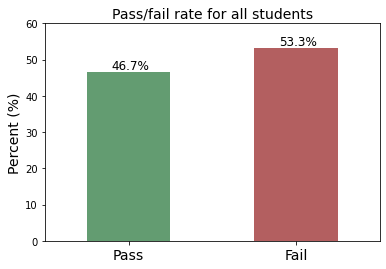

In [ ]:
df['pass'].value_counts(normalize=True).loc[[1, 0]].mul(100).plot(kind='bar', color=['#639c71', '#b35f60'])
plt.xticks([0, 1], ["Pass", "Fail"], rotation=0)
plt.ylabel('Percent (%)', fontsize=14)
plt.xlabel('Outcome')
passval = round(df['pass'].value_counts(normalize=True).loc[[1, 0]].mul(100)[1],2)
failval = round(df['pass'].value_counts(normalize=True).loc[[1, 0]].mul(100)[0],2)
plt.text(-0.1, passval+0.6, str(passval)+"%", fontsize=12)
plt.text(0.9, failval+0.6, str(failval)+"%", fontsize=12)
plt.ylim((0,60))
plt.xlabel("")
plt.xticks(fontsize=14)
plt.title('Pass/fail rate for all students', fontsize=14)
plt.show();

**=> The overall pass rate of all students is 46.7%**.

Since we are interested the demographics of the students who passed the test, we filter for the students who passed the test as follows:

In [ ]:
# DataFrame of students who passed the test
df_pass = df[df['pass'] == 1]   

# DataFrame of students who failed the test
df_fail = df[df['pass'] == 0]

### Distribution of the sex of all students

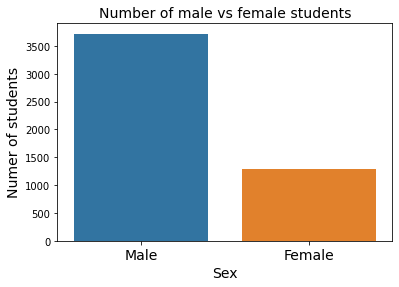

In [ ]:
# Plot the number of male vs female students
sns.countplot(data=df, x='sex')
plt.title('Number of male vs female students', fontsize=14)
plt.xlabel("Sex", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Numer of students", fontsize=14)
plt.show()

Overall, almost 3 times more males take the test compared to females. However, we can also examine the pass rate for males vs females.

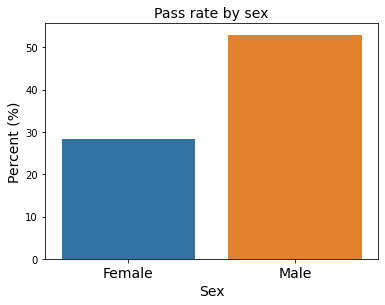

In [ ]:
df_plot = df.groupby('sex')['pass'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_plot = df_plot[df_plot['pass'] == 1]
g = sns.catplot(x="sex", y="percent", data=df_plot, kind='bar', height=4, aspect=1.35)
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.title('Pass rate by sex', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Sex',fontsize=14)
plt.ylabel('Percent (%)',fontsize=14)
plt.show();

The above plot shows that females have a much lower pass rate compared to males.

**=> Females have a 28% pass rate but males have a 53% pass rate.**

### Language of students who passed

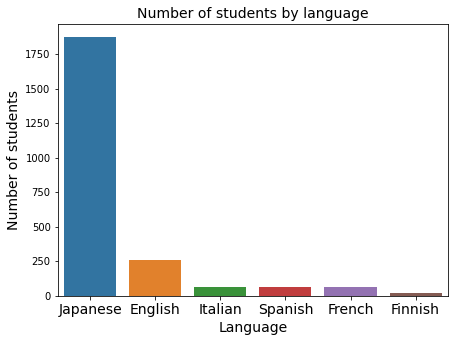

In [ ]:
# Plot the number of languages
fig, ax=plt.subplots(figsize=(7,5))
sns.countplot(data=df_pass, x='lang', order = df['lang'].value_counts().index)
plt.title('Number of students by language',fontsize=14)
plt.xlabel('Language',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Number of students',fontsize=14)
plt.show()

Japanese was most common language. However, since these are only raw count values, we can look at the pass rates for each language.

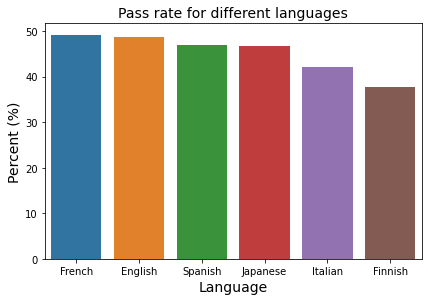

In [ ]:
df_plot = df.groupby('lang')['pass'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_plot = df_plot.sort_values(['pass','percent'], ascending=False).reset_index(drop=True)
df_plot = df_plot[df_plot['pass'] == 1]
g = sns.catplot(x="lang", y="percent", data=df_plot, kind='bar', height=4, aspect=1.5, order=df_plot['lang'].to_list()).set(title='Pass rate of different languages')
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.title("Pass rate for different languages", fontsize=14)
plt.xlabel("Language", fontsize=14)
plt.ylabel("Percent (%)", fontsize=14)
plt.show()

**=> French had the highest pass rate with 49.2%. Second was English.**

### Number of students who passed by country

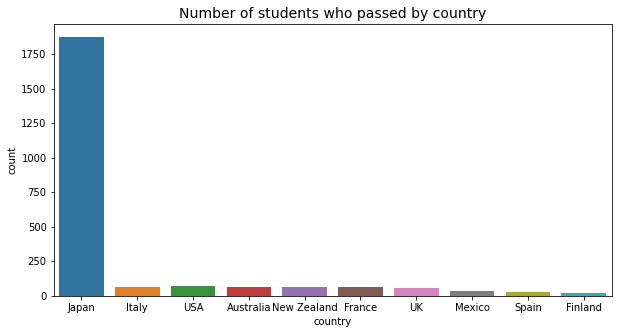

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df_pass, x='country', order = df['country'].value_counts().index)
plt.title('Number of students who passed by country', fontsize=14)
plt.show()

Japan had the most people who took the test by far.

### Pass rate by country

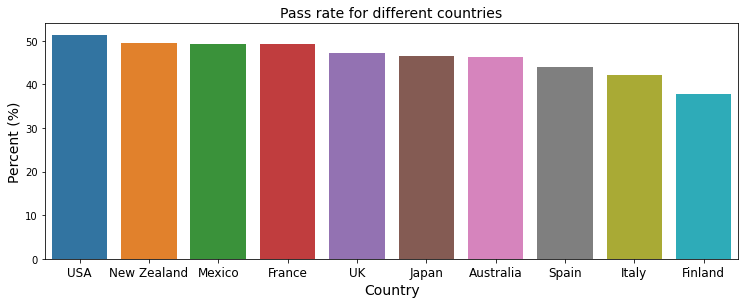

In [ ]:
df_plot = df.groupby('country')['pass'].value_counts(normalize=True).rename('percent').mul(100).reset_index()
df_plot = df_plot.sort_values(['pass','percent'], ascending=False).reset_index(drop=True)
df_plot = df_plot[df_plot['pass'] == 1]
g = sns.catplot(x="country", y="percent", data=df_plot, kind='bar', height=4, aspect=2.6, order=df_plot['country'].to_list()).set(title='Pass rate of different countries')
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
plt.title("Pass rate for different countries", fontsize=14)
plt.ylabel('Percent (%)',fontsize=14)
plt.xlabel('Country',fontsize=14)
plt.xticks(fontsize=12)

plt.show()

**=> Students from USA have the highest pass rate (51.4%). While Japan has the most number of students who took the test, they have a pass rate (46.6%).**

### Age distribution of students who passed

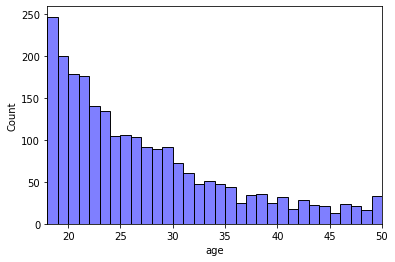

In [ ]:
sns.histplot(data=df_pass, x='age', color='blue', alpha=0.5, bins=np.arange(18,51,1))
plt.xlim((18, 50))
plt.show()

Larger number of younger students took the test and therefore larger number of younger students pass.

Next, I binned the ages of the people who took the test into specific groups to examine the absolute number of students within each group and the pass rate of the students within each group.

In [ ]:
age_bins = [17.9, 20, 25, 30, 35, 40, 45, 50.1]
df['age_bin'] = pd.cut(df['age'], bins=age_bins)

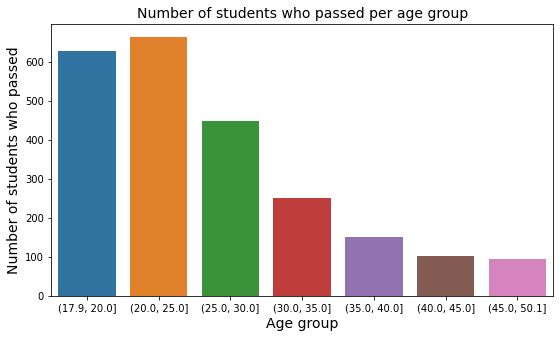

In [ ]:
df_plot = df.groupby('age_bin')['pass'].value_counts().rename('count').reset_index()
df_plot = df_plot[df_plot['pass'] == 1]

fig, ax=plt.subplots(figsize=(9,5))
sns.barplot(data=df_plot, y="count", x="age_bin")
plt.xlabel("Age group", fontsize=14)
plt.ylabel("Number of students who passed", fontsize=14)
plt.title('Number of students who passed per age group', fontsize=14)
plt.show()

The ages 18 to 25 has the highest absolute number of students passing. This means that young people are more likely to take this test. The number of people who take the test decreases as the age range increases.

Next, we look at the pass rate within an age group. Therefore, for all the students within an age group, we look at the percentage of them who pass.

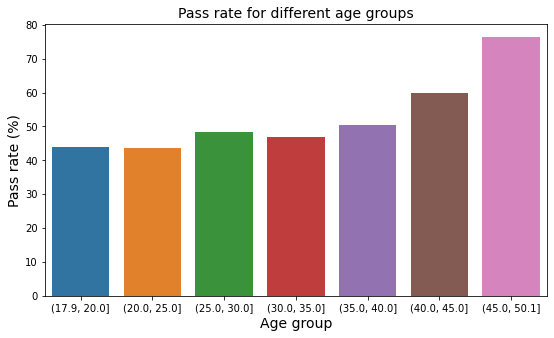

In [ ]:
df_plot = df.groupby('age_bin')['pass'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
df_plot = df_plot[df_plot['pass'] == 1]

fig, ax=plt.subplots(figsize=(9,5))
sns.barplot(data=df_plot, y="percent", x="age_bin")
plt.xlabel("Age group", fontsize=14)
plt.ylabel("Pass rate (%)", fontsize=14)
plt.title('Pass rate for different age groups', fontsize=14)
plt.show()

When you look at people within a particular age group who took the test, people who were in the ages of 45 to 50 had the highest pass rate. In fact, as the age of the student increases, the pass rate increases. However this is offset by the fact that people younger than 25 make up the majority of test-takers.

### Summary for Part 1:

Based on the EDA, in terms of absolute numbers, a student who passed is most likely to be:
1. Male
2. Students from Japan
3. Language is Japanese
4. Below age 25

This means that if we randomly picked a student who passes, he is mostly likely to have the demographics listed above.

When we examine the pass rate of different demographic groups, we find the groups with the highest pass rates are:
1. Male
2. Students from USA
3. Language is French
4. Age 45-50

This means that if we specify the demographics of the student, we can calculate a probability of them passing. In the future we could calculate more sophisticated probabilities for combined demographic groups using Bayes theorem.

## Part 2: The efficacy of the two interventions - the test prep course and the Dojo class

Looking at the data, I discovered that there are four possible combinations for the students in terms of their preparation for the test. We loop through all four combinations and calculate the pass/fail rate for each of the above combinations.

| dojo_class | test_prep |
| --- | --- |
| False | False |
| False | True |
| True | False |
| True | True |

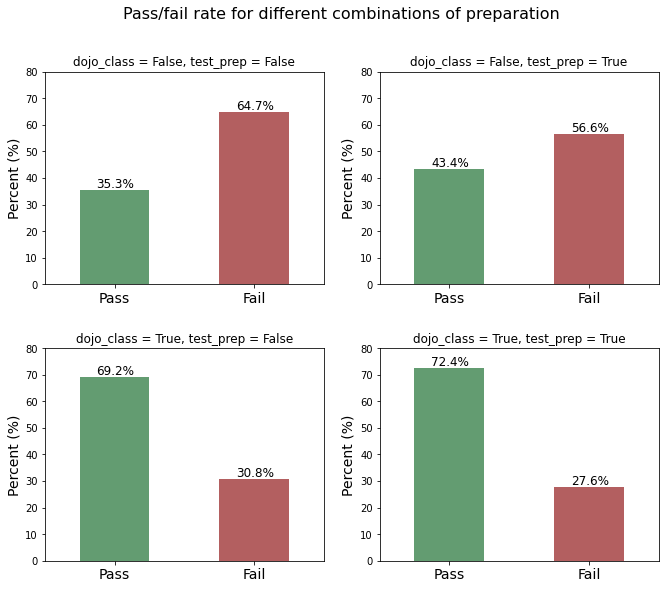

In [ ]:
# List of possible combinations
comb_list = [(i, j) for i in [False, True] for j in [False, True]]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 9))
fig.suptitle('Pass/fail rate for different combinations of preparation', fontsize=16)
for i, ax in zip(range(4), axs.ravel()):
    plt.subplots_adjust(hspace = 0.3)
    df_temp = df[(df['dojo_class'] == comb_list[i][0]) & (df['test_prep'] == comb_list[i][1])]
    df_temp.value_counts('pass', normalize=True).mul(100).loc[[1, 0]].plot(ax=ax, kind='bar', color=['#639c71', '#b35f60'])
    ax.set_xlabel('')
    ax.set_xticklabels(["Pass","Fail"], rotation=0, fontsize=14)
    ax.set_ylim((0, 80))
    ax.set_ylabel('Percent (%)', fontsize=14)
    ax.set_title("dojo_class = "+str(comb_list[i][0])+", test_prep = "+str(comb_list[i][1]))
    passval = round(df_temp.value_counts('pass', normalize=True).mul(100)[1],1)
    failval = round(df_temp.value_counts('pass', normalize=True).mul(100)[0],1)
    ax.text(-0.13, passval+1, str(passval)+"%", fontsize=12)
    ax.text(0.87, failval+1, str(failval)+"%", fontsize=12)

As we can see in the figure above, students who did neither the Dojo class nor test prep had a 35.3% pass rate. Students who did the test prep only had a 43.4% pass rate. The biggest increase was seen in the students who did the Dojo class only, where their pass rate jumps to 69.2%. However for students who did both the Dojo class and the test prep, there was only a 3.2% increase in the pass rate over the students who did the Dojo class only. 

**=> 69% of students who did only the Dojo class passed. 56% of students who did only the test prep passed. Students that didn't do any preparation at all had a pass rate of 35%**

### Distribution of hours of study for each combination of Dojo class and test prep

I also wanted to examine the number of hours of study for each combination. Maybe students who study more would pass anyway.

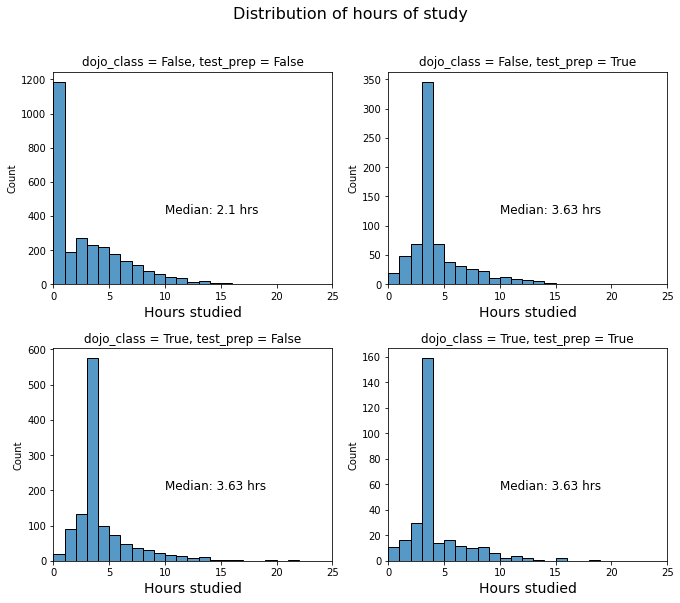

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 9))
fig.suptitle('Distribution of hours of study', fontsize=16)
for i, ax in zip([0, 1, 2, 3], axs.ravel()):
    plt.subplots_adjust(hspace = 0.3)
    df_plot = df[(df['dojo_class'] == comb_list[i][0]) & (df['test_prep'] == comb_list[i][1])]
    sns.histplot(df_plot['hours_studied'], bins=np.arange(0,25,1), kde=False, ax=ax)
    ax.set_title("dojo_class = "+str(comb_list[i][0])+", test_prep = "+str(comb_list[i][1]))
    ax.set_xlabel('Hours studied', fontsize=14)
    ax.set_xlim((0, 25))
    textval = round(df_plot['hours_studied'].median(),2)
    yval = ax.get_ylim()[1]/3
    ax.text(10, yval, "Median: "+str(textval)+" hrs", fontsize=12)

Examining the distribution of the number of hours studied, the students who did either the Dojo class or test prep had a higher median than the students who did neither. However since we impute the missing values using the mean of the distribution by sex, we find that the most common number of hours studied is the median, which was imputed. In terms of future work, I would try imputing by sex and age group as well.

## 3. Create a model that can predict whether or not a student will pass the test

Now, I attempt to predict whether or not a student will pass the test. I first prepare the data for input into our machine learning model. The steps that we take in order are: 
1. Converting the columns to categorical datatype for later one-hot encoding
2. Defining the target and feature variables for the model. In this case the target variable is 'pass'
3. Converting the categorical features into dummy variables through one-hot encoding.
4. Splitting the data into a train set and a test set. A 70/30 train/test split was used in this case. This means that the model was trained on 70% of the dataset, and the final accuracy of the test data is used to evaluate the fit of the model.
5. Scaling the numerical features of the data.
6. Finally, the model is trained and the accuracy of the model is evaluated. Since there are many categorical variables due to the one-hot encoding, I chose to use tree-based models. I chose to use XGBoost because due to past experience, it seems to give the best results "out of the box", without much hyperparameter tuning.

### Converting some columns to categorial

In [ ]:
df['sex'] = df['sex'].astype('category')
df['lang'] = df['lang'].astype('category')
df['country'] = df['country'].astype('category')
df['dojo_class'] = df['dojo_class'].astype('category')
df['test_prep'] = df['test_prep'].astype('category')

### Define target and feature variables

In [ ]:
y = df['pass']
X = df.drop(['pass','age_bin'], axis=1)

### Creating dummy variables

In [ ]:
# Creating dummy variables
col_dummies = ['sex', 'lang', 'country', 'dojo_class', 'test_prep']
X_dum = pd.get_dummies(X[col_dummies], drop_first=True)
X.drop(col_dummies, axis=1, inplace=True)
X = pd.concat([X, X_dum], axis=1)
X.head()

,age,hours_studied,sex_Male,lang_Finnish,lang_French,lang_Italian,lang_Japanese,lang_Spanish,country_Finland,country_France,country_Italy,country_Japan,country_Mexico,country_New Zealand,country_Spain,country_UK,country_USA,dojo_class_True,test_prep_True
0,20,10.578594,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,22,7.814520,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,27,4.213682,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,24,0.000000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,21,3.248907,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


### Split train and test data

In [ ]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

In [ ]:
# Print columns that will be scaled
col_scale = list(X.dtypes[(X.dtypes == 'float64') | (X.dtypes == 'int64')].index)
#print("Columns that will be scaled:", col_scale)

### Scaling the data

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[col_scale] = scaler.fit_transform(X_train[col_scale])
X_test_scaled[col_scale] = scaler.transform(X_test[col_scale])

### Predicting the pass rates using a logistic regression model

In [ ]:
xgb = XGBClassifier(max_depth=2, random_state=RSEED)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("Accuracy on train data :  ", round(accuracy_score(y_train, y_pred_train),3))
print("Accuracy on test data :  ", round(accuracy_score(y_test, y_pred_test),4))

Accuracy on train data :   0.707
Accuracy on test data :   0.6613


Initially, running the XGBClassifier with the default parameters lead to a significant difference between the train and test accuracy, which is indicative of overfitting to the training data. However, limiting the max_depth input of XGBClassifier resulted in improved results, where the difference in accuracy between the train and test data was not so large. In the future I would attempt to improve the accuracy through better feature engineering and optimizing the hyperparameters.

**=>A tree-based XGBClassifier model predicts with 66% accuracy the students that pass.**

## Future work

1. Imputing hours_studied by sex and age.

I imputed the missing values by age. However, there can be more sophisticated ways of doing the imputation, such as separating the students who did no preparation at all vs students who did some preparation. I would also try imputing by age group. It is possible that students of certain ages study more hours.

Also, I should not impute the whole set of data. I should impute the missing values for hours_studied based only on the mean or median of the train set. This means that the imputation step should be done after the train/test split.

<br>

2. Feature engineering to improve accuracy.

One idea I had was to bin the ages and hours studied into age ranges and hours studied ranges. One hot encoding can then be performed 

The accuracy using a preliminary logistic regression model is only 65%, it can maybe be improved through better feature engineering, more sophisticated tree-based models and a grid search for the optimum parameters.

I can also examine the importance of all the features in the model and drop features depending on how significant their contribution is.

<br>

3. Recommendations on what students could do to improve pass rate

Female students have a very low pass rate in general, I would look into if there are differences from male students in terms of the number of hours they studied, whether they took a Dojo course or whether they did test prep. 